In [1]:
! pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip freeze > requirements.txt

Carga del archivo CSV en un Dataframe de Pandas:

In [4]:
import pandas as pd

# Carga del archivo CSV
df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\InvoicePurchases12312016_Clean.csv')

In [5]:
print(df.head())  # Muestra las primeras filas

   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight  
0  2015-12-21  2016-02-16         6     214.26     3.47  
1  2015-12-22  2016-02-21        15     140.55     8.57  
2  2015-12-24  2016-02-16         5     106.60     4.61  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20  
4  2015-12-24  2016-02-12      1935   15527.25   429.20  


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df.rename(columns={
    'VendorNumber': 'NúmeroProveedor',
    'VendorName': 'NombreProveedor',
    'InvoiceDate': 'FechaFactura',
    'PONumber': 'NúmeroOrdenCompra',
    'PODate': 'FechaOrdenCompra',
    'PayDate': 'FechaPago',
    'Quantity': 'Cantidad',
    'Dollars': 'ValorenDólares',
    'Freight': 'CostodeEnvio'
}, inplace=True)

In [8]:
print(df.head())  # Muestra las primeras filas

   NúmeroProveedor              NombreProveedor FechaFactura  \
0              105  ALTAMAR BRANDS LLC            2016-01-04   
1             4466  AMERICAN VINTAGE BEVERAGE     2016-01-07   
2              388  ATLANTIC IMPORTING COMPANY    2016-01-09   
3              480  BACARDI USA INC               2016-01-12   
4              516  BANFI PRODUCTS CORP           2016-01-07   

   NúmeroOrdenCompra FechaOrdenCompra   FechaPago  Cantidad  ValorenDólares  \
0               8124       2015-12-21  2016-02-16         6          214.26   
1               8137       2015-12-22  2016-02-21        15          140.55   
2               8169       2015-12-24  2016-02-16         5          106.60   
3               8106       2015-12-20  2016-02-05     10100       137483.78   
4               8170       2015-12-24  2016-02-12      1935        15527.25   

   CostodeEnvio  
0          3.47  
1          8.57  
2          4.61  
3       2935.20  
4        429.20  


Elimino las columnas que no voy a utilizar:

In [11]:
df.drop(columns=['NombreProveedor'], inplace=True)

In [12]:
print(df.head())  # Muestra las primeras filas

   NúmeroProveedor FechaFactura  NúmeroOrdenCompra FechaOrdenCompra  \
0              105   2016-01-04               8124       2015-12-21   
1             4466   2016-01-07               8137       2015-12-22   
2              388   2016-01-09               8169       2015-12-24   
3              480   2016-01-12               8106       2015-12-20   
4              516   2016-01-07               8170       2015-12-24   

    FechaPago  Cantidad  ValorenDólares  CostodeEnvio  
0  2016-02-16         6          214.26          3.47  
1  2016-02-21        15          140.55          8.57  
2  2016-02-16         5          106.60          4.61  
3  2016-02-05     10100       137483.78       2935.20  
4  2016-02-12      1935        15527.25        429.20  


In [13]:
! pip freeze > requirements.txt

In [14]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NúmeroProveedor    5543 non-null   int64  
 1   FechaFactura       5543 non-null   object 
 2   NúmeroOrdenCompra  5543 non-null   int64  
 3   FechaOrdenCompra   5543 non-null   object 
 4   FechaPago          5543 non-null   object 
 5   Cantidad           5543 non-null   int64  
 6   ValorenDólares     5543 non-null   float64
 7   CostodeEnvio       5543 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 346.6+ KB
None


Visualización del tamaño del Dataframe (Filas y Columnas):

In [15]:
import numpy as np

In [16]:
np.shape(df)

(5543, 8)

Conversión del tipo de datos:

In [18]:
df['FechaOrdenCompra'] = pd.to_datetime(df['FechaOrdenCompra'], format='%Y-%m-%d')
df['Fechapago'] = pd.to_datetime(df['FechaPago'], format='%Y-%m-%d')
df['ValorenDólares'] = pd.to_numeric(df['ValorenDólares'], errors='coerce')
df['CostodeEnvio'] = pd.to_numeric(df['CostodeEnvio'], errors='coerce')
df['NúmeroOrdenCompra'] = pd.to_numeric(df['NúmeroOrdenCompra'], errors='coerce')

In [19]:
print(df.columns)

Index(['NúmeroProveedor', 'FechaFactura', 'NúmeroOrdenCompra',
       'FechaOrdenCompra', 'FechaPago', 'Cantidad', 'ValorenDólares',
       'CostodeEnvio', 'Fechapago'],
      dtype='object')


In [20]:
df.isnull().sum() #busco nulos

NúmeroProveedor      0
FechaFactura         0
NúmeroOrdenCompra    0
FechaOrdenCompra     0
FechaPago            0
Cantidad             0
ValorenDólares       0
CostodeEnvio         0
Fechapago            0
dtype: int64

In [21]:
duplicados = df[df.duplicated()]

print(duplicados)

Empty DataFrame
Columns: [NúmeroProveedor, FechaFactura, NúmeroOrdenCompra, FechaOrdenCompra, FechaPago, Cantidad, ValorenDólares, CostodeEnvio, Fechapago]
Index: []


In [22]:
print(df.info())  # Información de columnas y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NúmeroProveedor    5543 non-null   int64         
 1   FechaFactura       5543 non-null   object        
 2   NúmeroOrdenCompra  5543 non-null   int64         
 3   FechaOrdenCompra   5543 non-null   datetime64[ns]
 4   FechaPago          5543 non-null   object        
 5   Cantidad           5543 non-null   int64         
 6   ValorenDólares     5543 non-null   float64       
 7   CostodeEnvio       5543 non-null   float64       
 8   Fechapago          5543 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 389.9+ KB
None


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

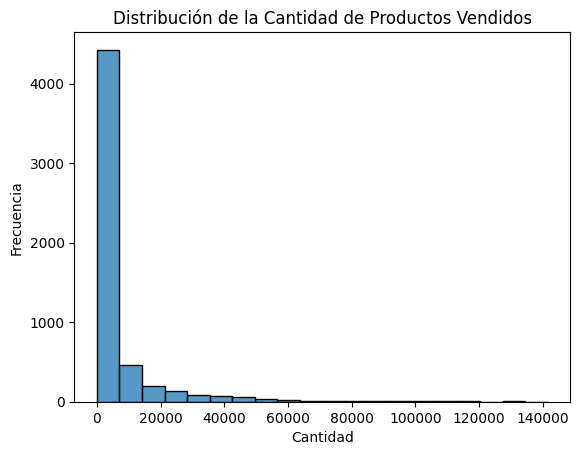

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Cantidad'], bins=20, kde=False)
plt.title('Distribución de la Cantidad de Productos Vendidos')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

In [26]:
pip install sqlalchemy pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
def calcular_estadisticas(data): 
    for columna in data.columns:
        if data[columna].dtype == 'float64' or data[columna].dtype == 'int64':
            print(columna)
            print('Mediana:', data[columna].median())
            print('Varianza: ', np.around((data[columna].var()),decimals=2)) # Casteo (redondeo) a 2 decimales
            print('Rango:', data[columna].max() - data[columna].min())
            print('Moda:', data[columna].mode()[0])
            print('--------------------------------')

calcular_estadisticas(df)

NúmeroProveedor
Mediana: 7240.0
Varianza:  1195925680.28
Rango: 201357
Moda: 4425
--------------------------------
NúmeroOrdenCompra
Mediana: 10890.0
Varianza:  2562752.64
Rango: 5555
Moda: 8106
--------------------------------
Cantidad
Mediana: 423.0
Varianza:  208898984.07
Rango: 141659
Moda: 12
--------------------------------
ValorenDólares
Mediana: 4765.45
Varianza:  19665583556.16
Rango: 1660431.74
Moda: 214.26
--------------------------------
CostodeEnvio
Mediana: 24.73
Varianza:  509203.69
Rango: 8468.199999999999
Moda: 0.26
--------------------------------


In [28]:
# Guardar el DataFrame transformado
df.to_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaInvoicePurchasesFINAL12312016', index=False) 

In [29]:
#carga archivo csv
df2 = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaInvoicePurchasesFINAL12312016')

In [30]:
print(df2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NúmeroProveedor    5543 non-null   int64  
 1   FechaFactura       5543 non-null   object 
 2   NúmeroOrdenCompra  5543 non-null   int64  
 3   FechaOrdenCompra   5543 non-null   object 
 4   FechaPago          5543 non-null   object 
 5   Cantidad           5543 non-null   int64  
 6   ValorenDólares     5543 non-null   float64
 7   CostodeEnvio       5543 non-null   float64
 8   Fechapago          5543 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 389.9+ KB
None


In [39]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine, types

facturas_df = pd.read_csv(r'C:\Users\bianc\OneDrive\Escritorio\proyectofinal\LimpiezaInvoicePurchasesFINAL12312016')

facturas_df['NúmeroProveedor'] = facturas_df['NúmeroProveedor'].astype(str)  # Convertir a string para usar VARCHAR en SQL
facturas_df['FechaFactura'] = pd.to_datetime(facturas_df['FechaFactura']) 
facturas_df['FechaOrdenCompra'] = pd.to_datetime(facturas_df['FechaOrdenCompra'])
facturas_df['FechaPago'] = pd.to_datetime(facturas_df['FechaPago'])

facturas_df = facturas_df.drop(columns=['Fechapago'], errors='ignore')

# Crear la conexión con SQL Server usando autenticación de Windows
# Usando el nombre del servidor SQLEXPRESS y Trusted Connection
engine = create_engine('mssql+pyodbc://BIANCA\SQLEXPRESS/PremiumDrinks?trusted_connection=yes&driver=ODBC+Driver+18+for+SQL+Server&TrustServerCertificate=yes')

# Especificar los tipos de datos para cada columna en SQL Server
dtype_sql = {
     'NúmeroProveedor': types.INTEGER,
    'FechaFactura': types.DATE,
    'NúmeroOrdenCompra': types.INTEGER,
    'FechaOrdenCompra': types.DATE,
    'FechaPago': types.DATE,  # Mantén solo 'FechaPago'
    'Cantidad': types.INTEGER,
    'ValorenDólares': types.FLOAT,
    'CostodeEnvio': types.FLOAT
    
}

# Exportar el DataFrame a una tabla SQL llamada Ventas2016
facturas_df.to_sql('Facturas', con=engine, if_exists='replace', index=False, dtype=dtype_sql)

print("Datos exportados exitosamente a la tabla Compras2016 en la base de datos PremiumDrinks")

Datos exportados exitosamente a la tabla Compras2016 en la base de datos PremiumDrinks
